## Setting up
- Import Relevant Libraries
- Reading csv files

In [213]:
import pandas as pd
import numpy as np
import seaborn as  sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [214]:
acc_data = pd.read_csv("Step Up - Experian Account Data.csv")
acc_holder = pd.read_csv("Step Up - Experian Acount Holder Data.csv")
mule_flag = pd.read_csv("Mule Flag.csv")

Display dataset

In [215]:
acc_data.head()

,Identifier,AccountLength,AverageBalance,NumTransactions,NumDeposits,NumWithdrawals,NumTransfers,NumLoans,NumCreditCards,NumSavingsAccounts
0,ID_0001,19.0,NaN,305.0,230.0,288.0,39.0,7.0,2.0,0.0
1,ID_0002,3.0,24989.0,331.0,203.0,147.0,5.0,NaN,4.0,2.0
2,ID_0003,NaN,10915.0,109.0,43.0,227.0,37.0,4.0,1.0,1.0
3,ID_0004,19.0,43552.0,87.0,149.0,236.0,168.0,1.0,2.0,1.0
4,ID_0005,9.0,19990.0,NaN,49.0,37.0,99.0,9.0,3.0,2.0


In [216]:
len(acc_data), len(acc_data.dropna())

(1000, 611)

In [217]:
acc_holder.head()

,Identifier,DateOfBirth,Gender,Income,CreditScore,LoanAmount,EmploymentStatus,MaritalStatus,OccupancyStatus,NumDependents,SocialMediaUsageHours,ShoppingFrequencyPerMonth,HealthInsuranceStatus
0,ID_0001,06/01/1964,Female,96534.0,NaN,44116.0,Unemployed,Single,Owner,3.0,21.0,9.0,Yes
1,ID_0002,26/11/2004,Male,75106.0,390.0,9782.0,Unemployed,NaN,Owner,2.0,9.0,10.0,No
2,ID_0003,02/07/1992,Male,50678.0,779.0,38650.0,Student,Divorced,Owner,3.0,16.0,5.0,Yes
3,ID_0004,03/07/1974,Male,96218.0,757.0,22366.0,Student,Single,Owner,1.0,21.0,0.0,No
4,ID_0005,13/05/1976,Male,83230.0,750.0,28557.0,Employed,Single,Owner,1.0,11.0,5.0,No


In [218]:
len(acc_holder), len(acc_holder.dropna())

(1045, 550)

In [219]:
mule_flag.head()

,Identifier,MuleAccount
0,ID_0001,0.0
1,ID_0002,0.0
2,ID_0003,NaN
3,ID_0004,NaN
4,ID_0005,0.0


In [220]:
len(mule_flag), len(mule_flag.dropna())

(1000, 948)

## Data Audit

Reusable Functions

In [221]:
def correlation_plot(df):
    df_select = df.iloc[:, 1:].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(df_select,
                cmap = 'coolwarm',
                annot = True,
                vmin = -0.1,
                vmax = 0.1,
                center = 0,
                linewidths = 0.5)

### Account Data

In [222]:
acc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Identifier          1000 non-null   object 
 1   AccountLength       948 non-null    float64
 2   AverageBalance      948 non-null    float64
 3   NumTransactions     948 non-null    float64
 4   NumDeposits         948 non-null    float64
 5   NumWithdrawals      948 non-null    float64
 6   NumTransfers        948 non-null    float64
 7   NumLoans            948 non-null    float64
 8   NumCreditCards      949 non-null    float64
 9   NumSavingsAccounts  948 non-null    float64
dtypes: float64(9), object(1)
memory usage: 78.3+ KB


In [223]:
duplicate_count = acc_data['Identifier'].duplicated().sum()

In [224]:
duplicate_count

0

In [225]:
acc_data.isnull().sum()

Identifier             0
AccountLength         52
AverageBalance        52
NumTransactions       52
NumDeposits           52
NumWithdrawals        52
NumTransfers          52
NumLoans              52
NumCreditCards        51
NumSavingsAccounts    52
dtype: int64

Checking Data Correlation

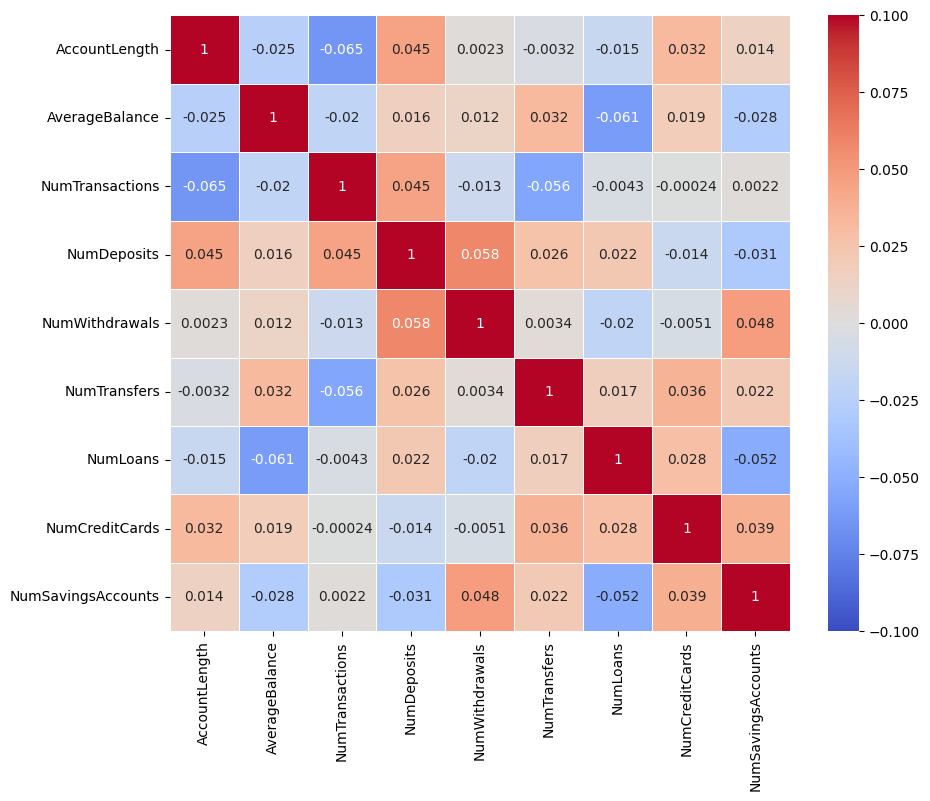

In [226]:
correlation_plot(acc_data)

Notice there are only very weak correlation between features - we cannot predict one feature from another.

Try using imputation method for missing data.

Visualising Distibution of Data

In [227]:
summ_acc_data = acc_data.describe()
summ_acc_data

,AccountLength,AverageBalance,NumTransactions,NumDeposits,NumWithdrawals,NumTransfers,NumLoans,NumCreditCards,NumSavingsAccounts
count,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,949.000000,948.000000
mean,15.103376,25481.985232,252.247890,153.948312,152.660338,98.294304,4.670886,2.076923,0.988397
std,8.332952,13936.320951,141.995191,85.569836,83.936786,58.319106,2.872018,1.431040,0.805782
min,1.000000,1082.000000,10.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,13586.750000,129.000000,81.750000,81.000000,49.000000,2.000000,1.000000,0.000000
50%,15.000000,25654.000000,252.000000,154.000000,151.500000,93.000000,5.000000,2.000000,1.000000
75%,22.000000,37293.000000,375.250000,230.000000,220.250000,150.000000,7.000000,3.000000,2.000000
max,29.000000,49908.000000,498.000000,299.000000,299.000000,199.000000,9.000000,4.000000,2.000000


Data Imputation

By Rule of Thumb - k = sqrt(n)/2 where in this case k ~= 15

In [228]:
imputer = KNNImputer(n_neighbors=15)
acc_data_imputed = imputer.fit_transform(acc_data.iloc[:, 1:])

In [229]:
acc_data_imputed = pd.DataFrame(acc_data_imputed, columns = acc_data.iloc[:, 1:].columns)

In [230]:
acc_data_imputed.head()

,AccountLength,AverageBalance,NumTransactions,NumDeposits,NumWithdrawals,NumTransfers,NumLoans,NumCreditCards,NumSavingsAccounts
0,19.000000,24184.8,305.0,230.0,288.0,39.0,7.000000,2.0,0.0
1,3.000000,24989.0,331.0,203.0,147.0,5.0,5.333333,4.0,2.0
2,17.933333,10915.0,109.0,43.0,227.0,37.0,4.000000,1.0,1.0
3,19.000000,43552.0,87.0,149.0,236.0,168.0,1.000000,2.0,1.0
4,9.000000,19990.0,236.8,49.0,37.0,99.0,9.000000,3.0,2.0


In [231]:
acc_data_final = pd.concat([acc_data['Identifier'], acc_data_imputed], axis=1)

In [232]:
acc_data_final.head()

,Identifier,AccountLength,AverageBalance,NumTransactions,NumDeposits,NumWithdrawals,NumTransfers,NumLoans,NumCreditCards,NumSavingsAccounts
0,ID_0001,19.000000,24184.8,305.0,230.0,288.0,39.0,7.000000,2.0,0.0
1,ID_0002,3.000000,24989.0,331.0,203.0,147.0,5.0,5.333333,4.0,2.0
2,ID_0003,17.933333,10915.0,109.0,43.0,227.0,37.0,4.000000,1.0,1.0
3,ID_0004,19.000000,43552.0,87.0,149.0,236.0,168.0,1.000000,2.0,1.0
4,ID_0005,9.000000,19990.0,236.8,49.0,37.0,99.0,9.000000,3.0,2.0


Bins Creation
- Create bins to seperate the numerical data into multiple categories for easier visualisations

In [233]:
acc_data_final = acc_data_final.set_index("Identifier")
acc_data_final.head()

,AccountLength,AverageBalance,NumTransactions,NumDeposits,NumWithdrawals,NumTransfers,NumLoans,NumCreditCards,NumSavingsAccounts
Identifier,,,,,,,,,
ID_0001,19.000000,24184.8,305.0,230.0,288.0,39.0,7.000000,2.0,0.0
ID_0002,3.000000,24989.0,331.0,203.0,147.0,5.0,5.333333,4.0,2.0
ID_0003,17.933333,10915.0,109.0,43.0,227.0,37.0,4.000000,1.0,1.0
ID_0004,19.000000,43552.0,87.0,149.0,236.0,168.0,1.000000,2.0,1.0
ID_0005,9.000000,19990.0,236.8,49.0,37.0,99.0,9.000000,3.0,2.0


Create function to separate bins

In [234]:
def data_in_range(x, step):
    lower = (x // step) * step
    upper = lower + step - 1
    return f'{int(lower)}-{int(upper)}'

def data_separator(df, col, step):
    df[col] = df[col].apply(lambda x: data_in_range(x, step = step))

In [235]:
#Separating the numerical data into their own bins
data_separator(acc_data_final, "AccountLength", 5)
data_separator(acc_data_final, "AverageBalance", 10000)
data_separator(acc_data_final, "NumTransactions", 100)
data_separator(acc_data_final, "NumDeposits", 50)
data_separator(acc_data_final, "NumWithdrawals", 50)
data_separator(acc_data_final, "NumTransfers", 50)
data_separator(acc_data_final, "NumLoans", 2)

In [236]:
#Updating remaining numerical data into string
acc_data_final['NumCreditCards'] = np.ceil(acc_data_final['NumCreditCards']).astype(int).astype(str)
acc_data_final['NumSavingsAccounts'] = np.ceil(acc_data_final['NumSavingsAccounts']).astype(int).astype(str)

In [237]:
acc_data_final.head()

,AccountLength,AverageBalance,NumTransactions,NumDeposits,NumWithdrawals,NumTransfers,NumLoans,NumCreditCards,NumSavingsAccounts
Identifier,,,,,,,,,
ID_0001,15-19,20000-29999,300-399,200-249,250-299,0-49,6-7,2,0
ID_0002,0-4,20000-29999,300-399,200-249,100-149,0-49,4-5,4,2
ID_0003,15-19,10000-19999,100-199,0-49,200-249,0-49,4-5,1,1
ID_0004,15-19,40000-49999,0-99,100-149,200-249,150-199,0-1,2,1
ID_0005,5-9,10000-19999,200-299,0-49,0-49,50-99,8-9,3,2


In [238]:
acc_data_final.describe()

,AccountLength,AverageBalance,NumTransactions,NumDeposits,NumWithdrawals,NumTransfers,NumLoans,NumCreditCards,NumSavingsAccounts
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,6,5,5,6,6,4,5,5,3
top,10-14,20000-29999,200-299,150-199,100-149,50-99,4-5,3,1
freq,191,270,234,187,200,279,227,229,370


### Account Holder

In [239]:
acc_holder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Identifier                 1045 non-null   object 
 1   DateOfBirth                991 non-null    object 
 2   Gender                     992 non-null    object 
 3   Income                     989 non-null    float64
 4   CreditScore                987 non-null    float64
 5   LoanAmount                 990 non-null    float64
 6   EmploymentStatus           987 non-null    object 
 7   MaritalStatus              989 non-null    object 
 8   OccupancyStatus            990 non-null    object 
 9   NumDependents              990 non-null    float64
 10  SocialMediaUsageHours      985 non-null    float64
 11  ShoppingFrequencyPerMonth  990 non-null    float64
 12  HealthInsuranceStatus      989 non-null    object 
dtypes: float64(6), object(7)
memory usage: 106.3+ KB

In [240]:
duplicate_count = acc_holder['Identifier'].duplicated().sum()

In [241]:
duplicate_count

45

Mule Flag

In [242]:
mule_flag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Identifier   1000 non-null   object 
 1   MuleAccount  948 non-null    float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [243]:
mule_flag['MuleAccount'].unique()

array([ 0., nan,  1.])

In [244]:
mule_dropna = mule_flag.dropna()

In [245]:
mule_dropna = mule_dropna.set_index("Identifier")
mule_dropna

,MuleAccount
Identifier,
ID_0001,0.0
ID_0002,0.0
ID_0005,0.0
ID_0006,0.0
ID_0007,0.0
...,...
ID_0996,0.0
ID_0997,0.0
ID_0998,0.0


In [246]:
#Checking mule flagged percentage
percent_distribution = mule_dropna['MuleAccount'].value_counts()
print(percent_distribution)

MuleAccount
0.0    889
1.0     59
Name: count, dtype: int64


In [247]:
# mule_dropna['MuleAccount'] = np.ceil(mule_dropna['MuleAccount']).astype(int).astype(str)
# mule_dropna

In [248]:
mule_dropna.describe()

,MuleAccount
count,948.000000
mean,0.062236
std,0.241712
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


### Complete Easy Visualisation

In [249]:
#merging acc data and mule flags
combined_df = acc_data_final.join(mule_dropna, how = 'right')

In [250]:
combined_df

,AccountLength,AverageBalance,NumTransactions,NumDeposits,NumWithdrawals,NumTransfers,NumLoans,NumCreditCards,NumSavingsAccounts,MuleAccount
Identifier,,,,,,,,,,
ID_0001,15-19,20000-29999,300-399,200-249,250-299,0-49,6-7,2,0,0.0
ID_0002,0-4,20000-29999,300-399,200-249,100-149,0-49,4-5,4,2,0.0
ID_0005,5-9,10000-19999,200-299,0-49,0-49,50-99,8-9,3,2,0.0
ID_0006,25-29,20000-29999,300-399,50-99,250-299,0-49,6-7,1,2,0.0
ID_0007,20-24,10000-19999,100-199,200-249,150-199,50-99,6-7,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...
ID_0996,0-4,30000-39999,300-399,100-149,250-299,150-199,4-5,4,0,0.0
ID_0997,15-19,30000-39999,400-499,100-149,150-199,0-49,2-3,4,1,0.0
ID_0998,15-19,30000-39999,400-499,100-149,0-49,100-149,2-3,3,2,0.0


In [251]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 948 entries, ID_0001 to ID_1000
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountLength       948 non-null    object 
 1   AverageBalance      948 non-null    object 
 2   NumTransactions     948 non-null    object 
 3   NumDeposits         948 non-null    object 
 4   NumWithdrawals      948 non-null    object 
 5   NumTransfers        948 non-null    object 
 6   NumLoans            948 non-null    object 
 7   NumCreditCards      948 non-null    object 
 8   NumSavingsAccounts  948 non-null    object 
 9   MuleAccount         948 non-null    float64
dtypes: float64(1), object(9)
memory usage: 81.5+ KB


In [284]:
#Reusable function for visualisation
def mule_percentage_plot(df, feature):
    data = (df.groupby(feature)["MuleAccount"]
            .mean()
            .mul(100)
            .sort_values(ascending = False)
            .reset_index())
    
    plt.figure(figsize = (8,6))
    ax = sns.barplot(x = feature, y = "MuleAccount", data = data)
    plt.title(f'{feature} vs Mule Flag Percentage')
    plt.ylabel('Percentage of Mule Account')

    #show percentage of my bar plot
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height, f'{height:.1f}%',
                ha = 'center', va = 'bottom', fontsize = 10)
        

    plt.tight_layout()
    plt.show()



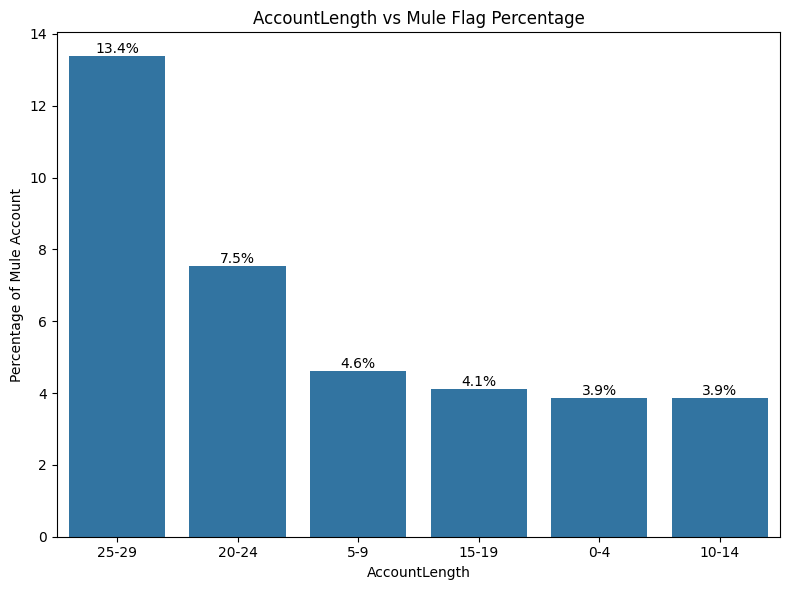

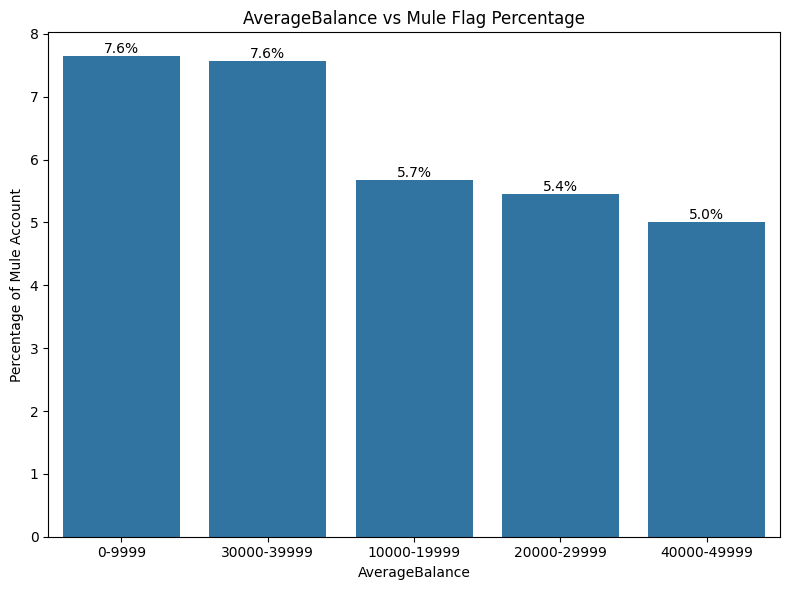

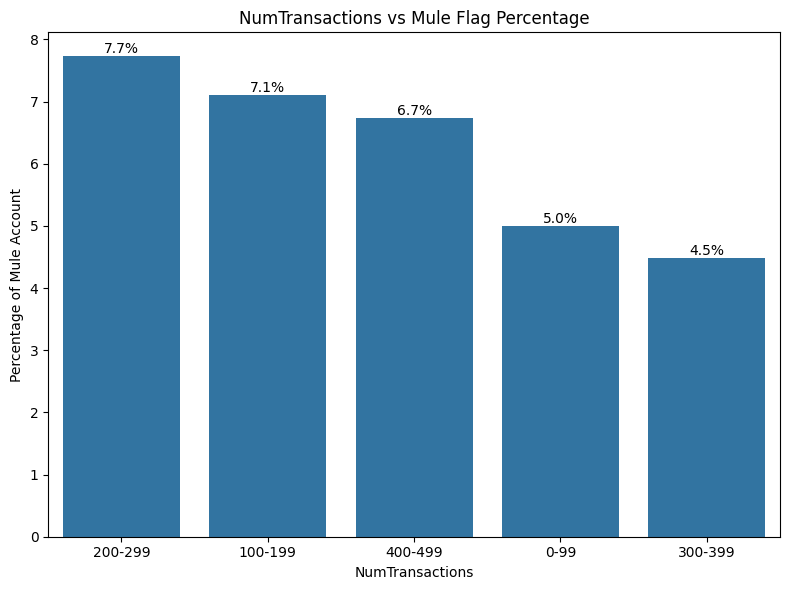

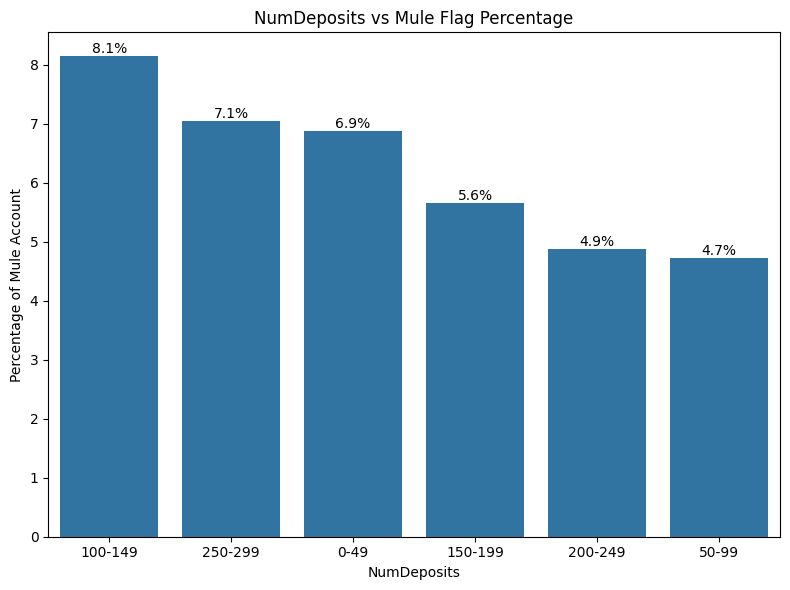

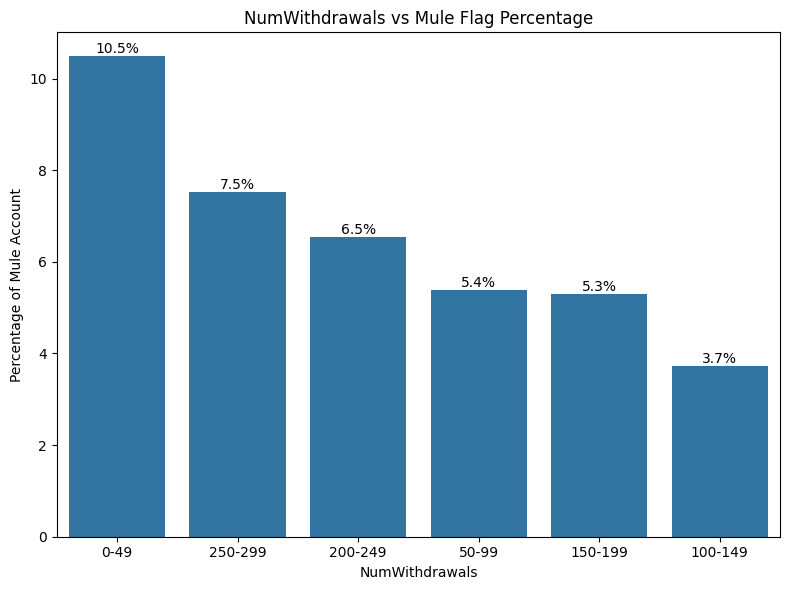

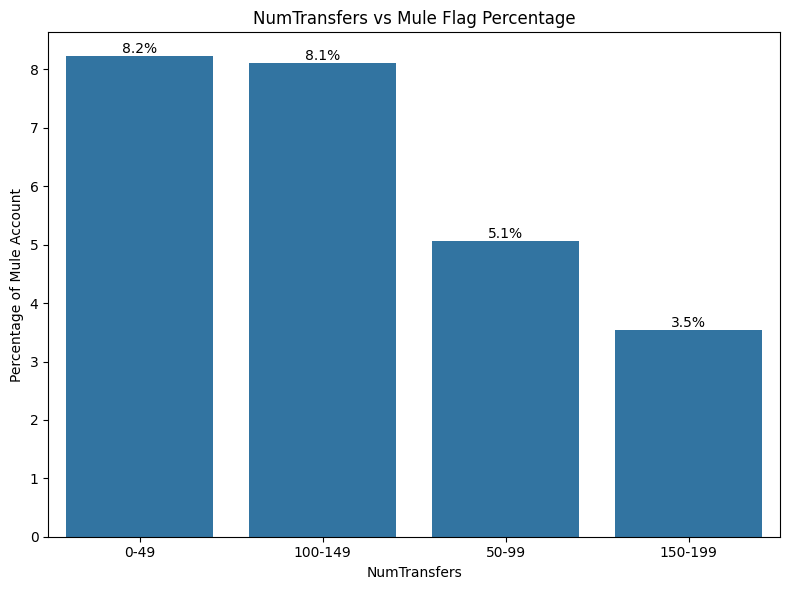

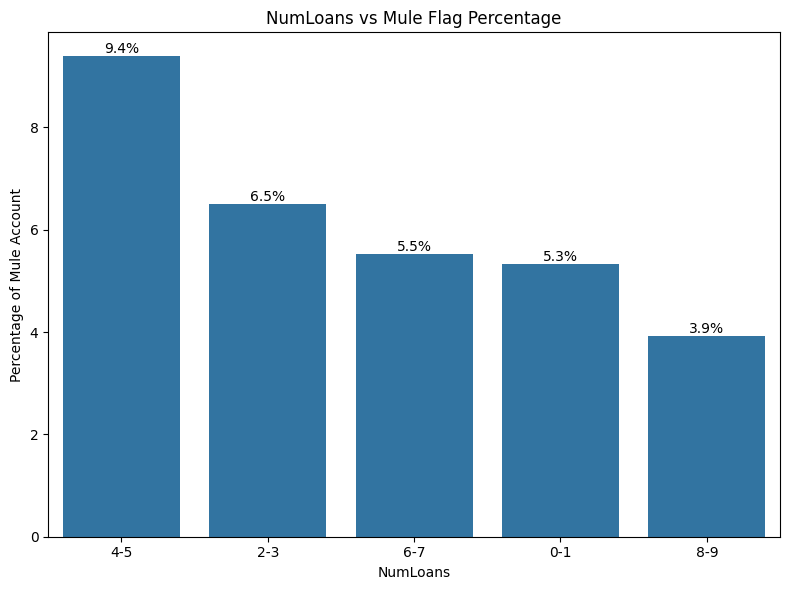

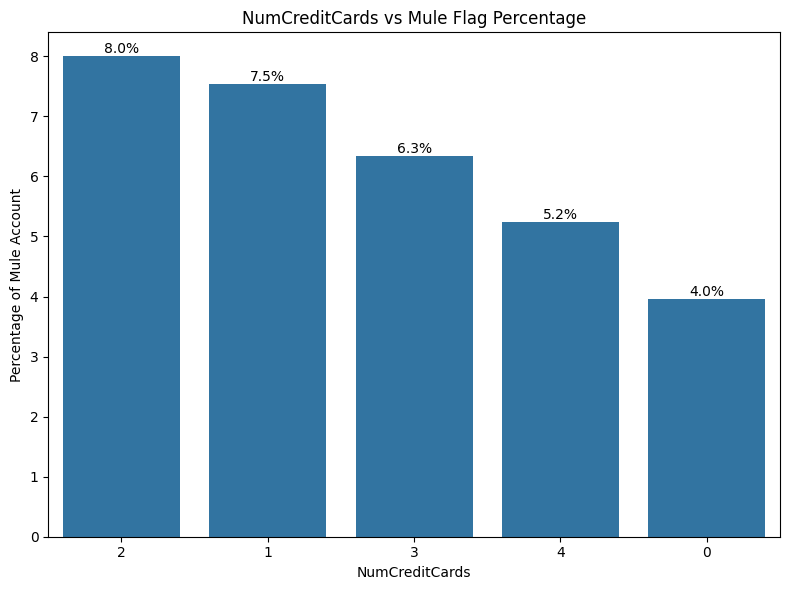

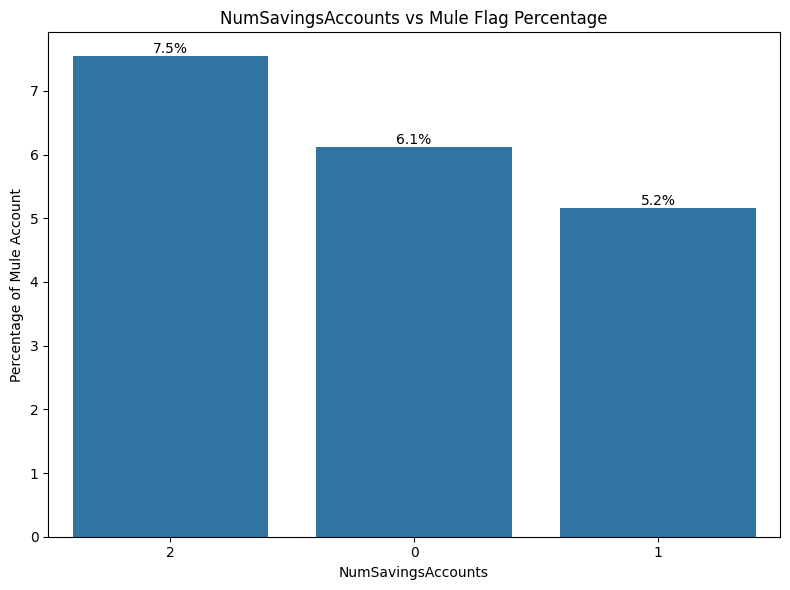

In [285]:
features = ['AccountLength', 'AverageBalance', 'NumTransactions', 'NumDeposits', 'NumWithdrawals', 'NumTransfers', 'NumLoans', 
            'NumCreditCards', 'NumSavingsAccounts']

for i in features:
    mule_percentage_plot(combined_df, i)

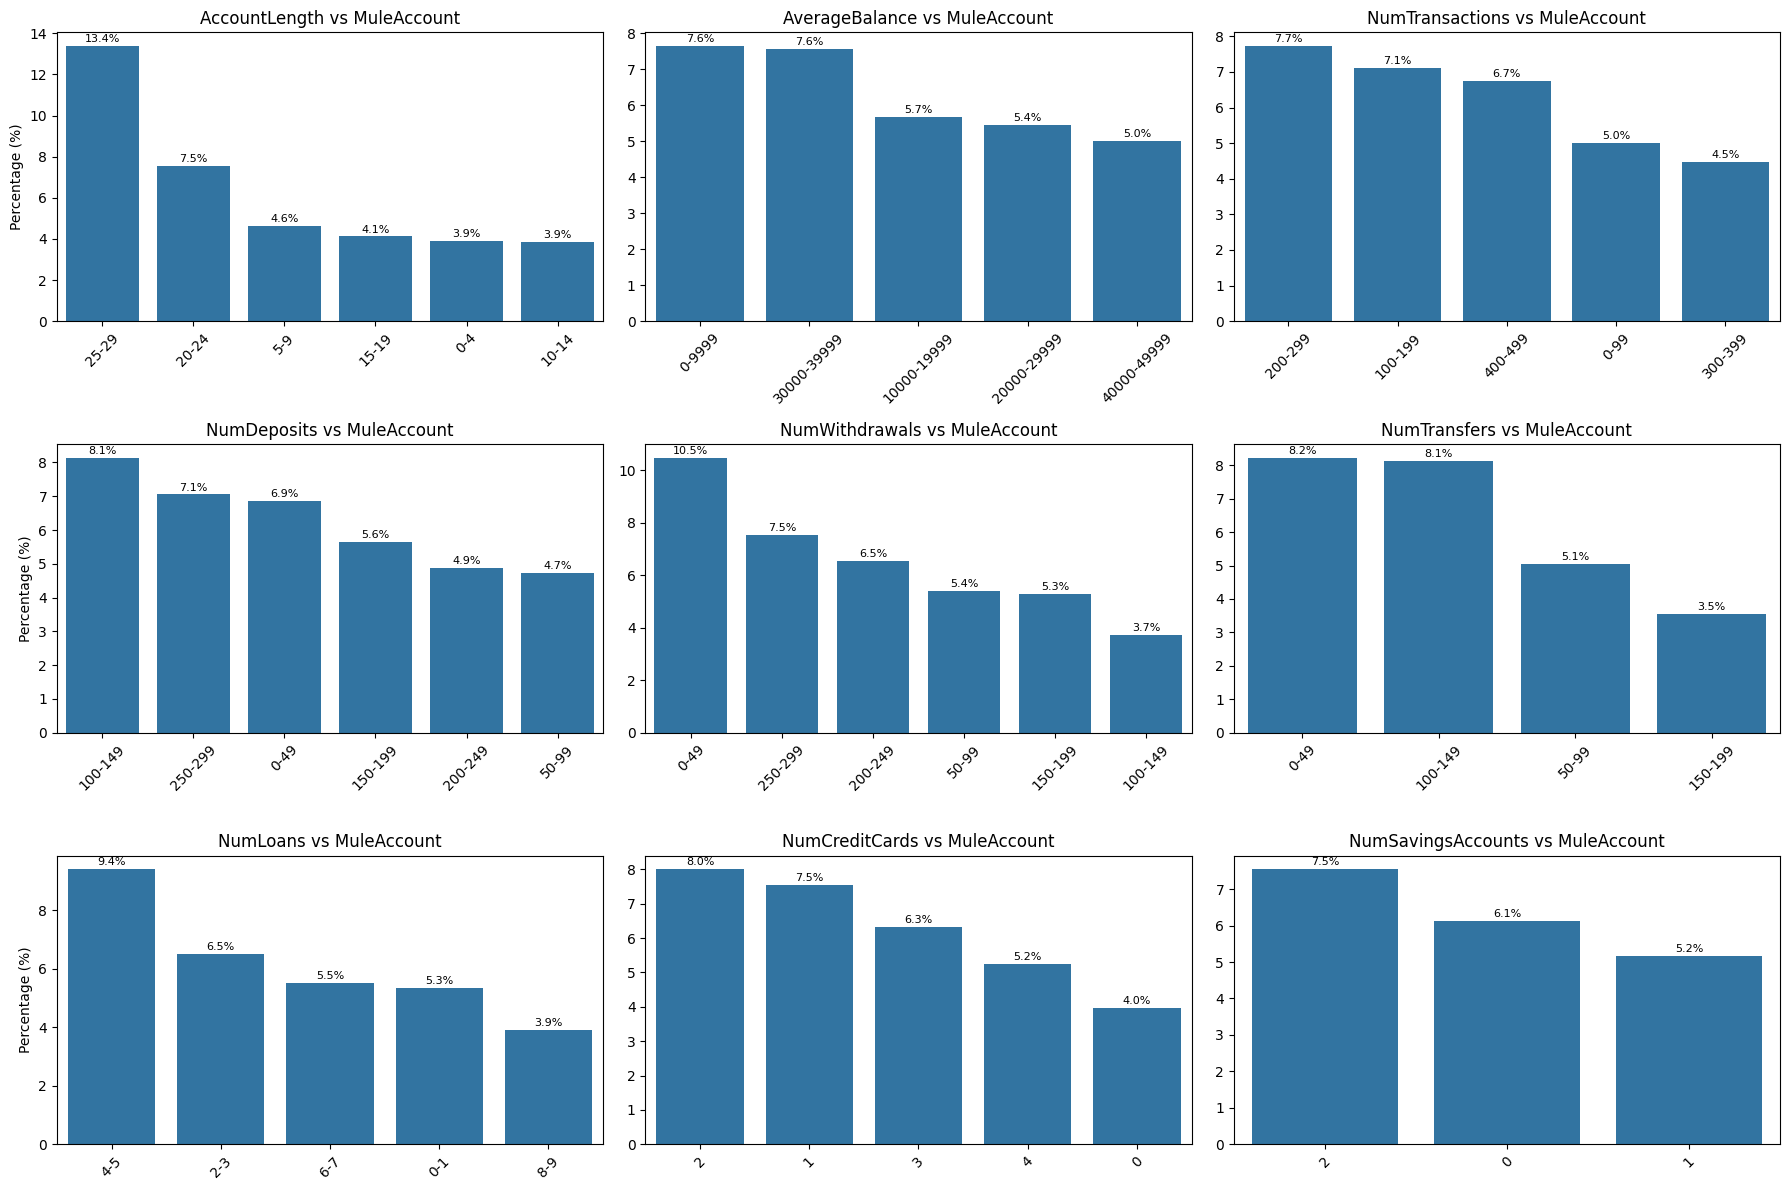

In [253]:
def plot_binary_percentages(df, features, target, ncols=3):
    """
    Plots percentage of 1s for multiple categorical features
    
    Args:
        df: DataFrame
        features: List of categorical feature names
        target: Binary target column name
        ncols: Number of columns in subplot grid
    """
    nrows = (len(features) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(18, 4*nrows))
    axes = axes.flatten()
    
    for i, feature in enumerate(features):
        # Calculate percentages
        data = (df.groupby(feature)[target]
               .mean()
               .mul(100)
               .sort_values(ascending=False)
               .reset_index())
        
        # Create plot
        ax = sns.barplot(x=feature, y=target, data=data, ax=axes[i])
        axes[i].set_title(f'{feature} vs {target}')
        axes[i].set_ylabel('Percentage (%)' if i % ncols == 0 else '')
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', rotation=45)
        
        # Add value labels
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.1f}%', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 5), textcoords='offset points', fontsize=8)
    
    # Hide empty subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Example usage
features = ['AccountLength', 'AverageBalance', 'NumTransactions', 'NumDeposits',
       'NumWithdrawals', 'NumTransfers', 'NumLoans', 'NumCreditCards',
       'NumSavingsAccounts']
plot_binary_percentages(combined_df, features, 'MuleAccount')

Random Forest Classifier Test

In [294]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# X: all features, y: target
X = combined_df.drop(columns=['MuleAccount'])
y = combined_df['MuleAccount'].astype('int')  # Convert to 0/1 if needed

# Encode categorical features
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

# Train Random Forest
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_encoded, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).reset_index(drop = True)

print(importance_df)

              Feature  Importance
0       AccountLength    0.148252
1         NumDeposits    0.120664
2      NumWithdrawals    0.120526
3      NumCreditCards    0.113996
4     NumTransactions    0.112180
5      AverageBalance    0.110174
6            NumLoans    0.107495
7        NumTransfers    0.097715
8  NumSavingsAccounts    0.068998


In [293]:
print(y.unique())
print(y.dtype)

[0 1]
int32


Correlation heatmap to check relationship between features and mule account

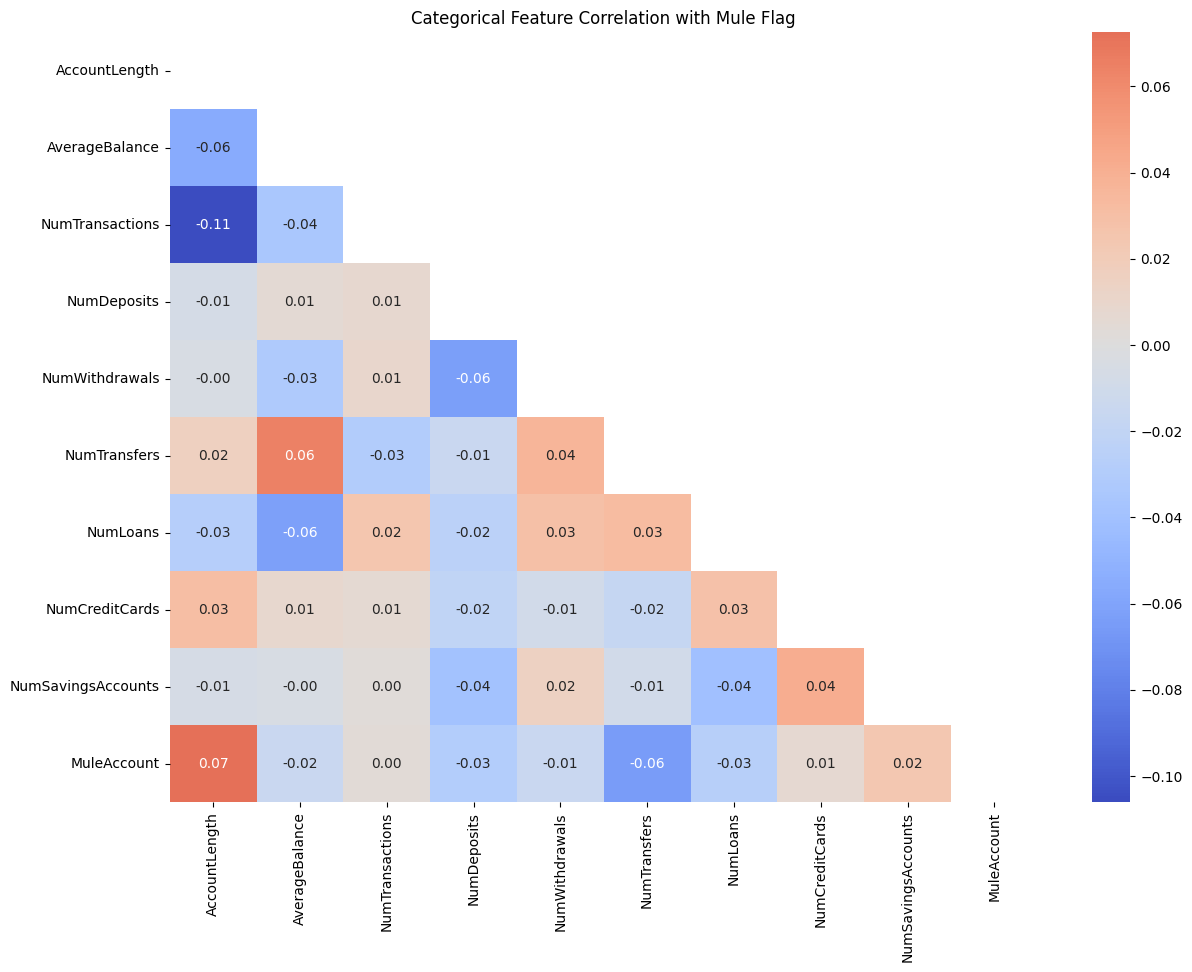

In [255]:
from sklearn.preprocessing import LabelEncoder

def categorical_correlation_heatmap(df):
    # Encode categorical variables
    df_encoded = df.apply(LabelEncoder().fit_transform)
    
    # Calculate correlation matrix
    corr = df_encoded.corr()
    
    # Plot heatmap
    plt.figure(figsize=(14, 10))
    sns.heatmap(corr, 
                annot=True, fmt='.2f', 
                cmap='coolwarm', center=0,
                mask=np.triu(np.ones_like(corr, dtype=bool)))
    plt.title('Categorical Feature Correlation with Mule Flag')
    plt.show()

# Example usage
categorical_correlation_heatmap(combined_df)

No correlations being observed

### Save Clean Dataframe as csv